In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',FutureWarning)
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

In [2]:
daily_acc = pd.read_csv('arp_DailyAccidents_sixCities_daily.csv', index_col=[0],parse_dates=[0])

In [3]:
daily_acc.head()

,ID
Date,
2016-04-02,2
2016-05-04,1
2016-06-14,5
2016-06-17,4
2016-06-21,209


In [4]:
daily_acc.shape

(1472, 1)

In [83]:
sample_df= daily_acc.sample(frac=0.3, replace=True, random_state=1)

In [84]:
sample_df.shape

(442, 1)

In [85]:
#daily_acc.describe()

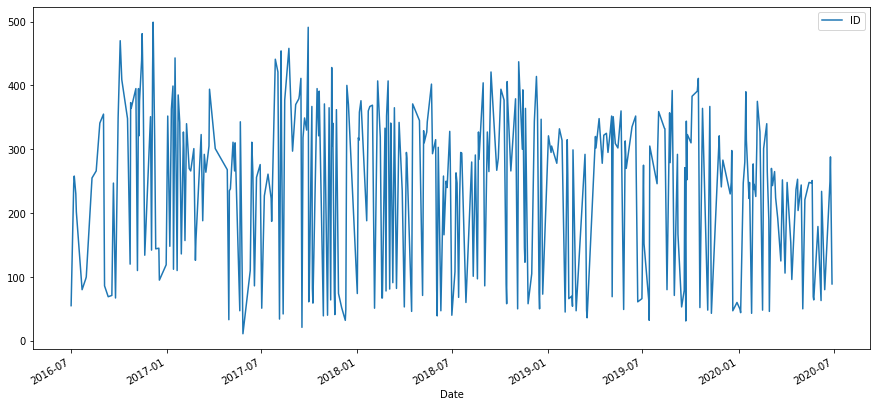

In [86]:
sample_df.plot(figsize=(15,7))
plt.show()

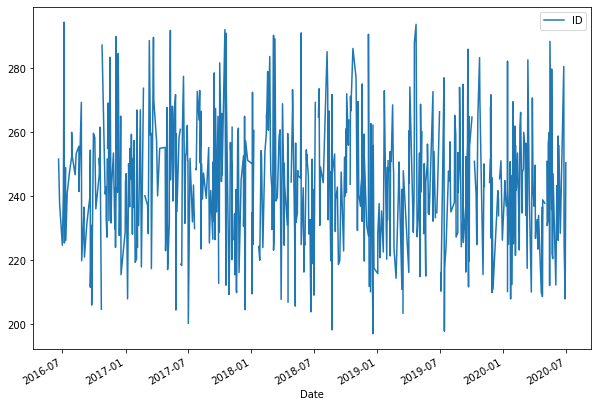

In [29]:
daily_acc_mean = sample_df.rolling(window = 30).mean()
daily_acc_mean.plot(figsize=(10,7))
plt.show()

### 2. Auto ARIMA Model

In [87]:
# Importing auto_arima 
from pmdarima.arima import auto_arima

In [88]:
#Testing for stationarity
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(sample_df)

(0.01, False)

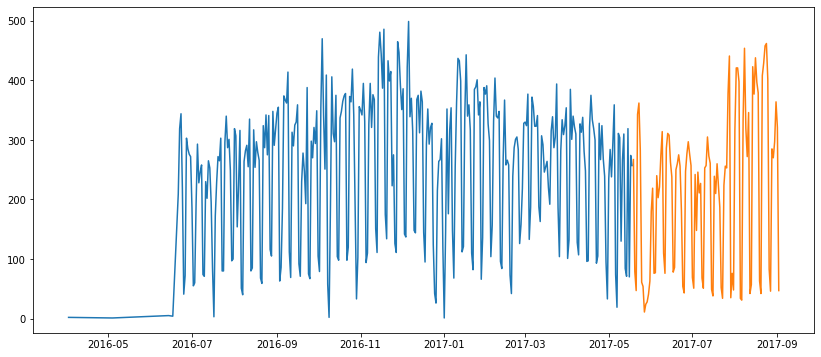

In [89]:
#Spliting the dataset into train and test

size = int(len(sample_df) * 0.76)
train = daily_acc[0:size] 
test = daily_acc[size:len(sample_df)]
plt.figure(figsize=(14,6))
plt.plot(train)
plt.plot(test)
plt.show()

In [90]:
arima_model =  auto_arima(train,start_p=0, d=1, start_q=0, 
                          max_p=5, max_d=5, max_q=5, start_P=0, 
                          D=1, start_Q=0, max_P=5, max_D=5,
                          max_Q=5, m=12, seasonal=True, 
                          error_action='warn',trace = True,
                          supress_warnings=True,stepwise = True,
                          random_state=20,n_fits = 50 )

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=4385.797, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=4232.795, Time=0.25 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.57 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=4386.928, Time=0.02 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=4176.640, Time=0.60 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=4080.051, Time=2.13 sec
 ARIMA(1,1,0)(4,1,0)[12]             : AIC=4060.163, Time=2.89 sec
 ARIMA(1,1,0)(5,1,0)[12]             : AIC=4059.912, Time=7.65 sec
 ARIMA(1,1,0)(5,1,1)[12]             : AIC=inf, Time=42.62 sec
 ARIMA(1,1,0)(4,1,1)[12]             : AIC=inf, Time=12.49 sec
 ARIMA(0,1,0)(5,1,0)[12]             : AIC=4076.259, Time=4.10 sec
 ARIMA(2,1,0)(5,1,0)[12]             : AIC=inf, Time=15.00 sec
 ARIMA(1,1,1)(5,1,0)[12]             : AIC=inf, Time=30.65 sec
 ARIMA(0,1,1)(5,1,0)[12]             : AIC=inf, Time=14.02 sec
 ARIMA(2,1,1)(5,1,0)[12]             : AIC=3

In [70]:
#arima_model.summary()

In [92]:
prediction1 = pd.DataFrame(arima_model.predict(n_periods = 107),index=test.index)
prediction1.columns = ['predicted_acc']
#prediction1

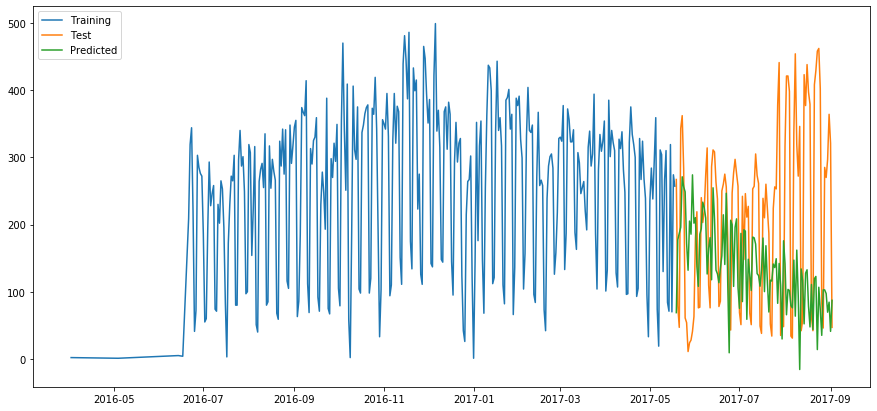

In [93]:
plt.figure(figsize=(15,7))
plt.plot(train,label="Training")
plt.plot(test,label="Test")
plt.plot(prediction1,label="Predicted")
plt.legend(loc = 'best')
plt.show()

In [39]:
from sklearn.metrics import r2_score
test['predicted_acc'] = prediction1
r2_score(test['Accidents'], test['predicted_acc'])

C:\Users\Henry\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


KeyError: 'Accidents'

In [40]:
test

,ID,predicted_acc
Date,,
2017-10-02,358,302.936567
2017-10-03,424,262.232913
2017-10-04,338,140.477077
2017-10-05,323,277.088465
2017-10-06,367,355.580713
...,...,...
2018-01-23,388,240.655429
2018-01-24,324,220.525234
2018-01-25,367,335.755974


In [19]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

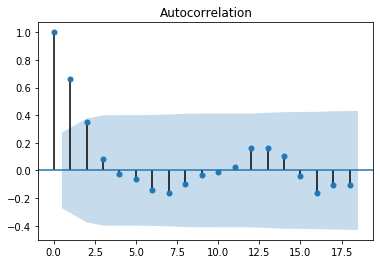

In [20]:
#plot_acf is to determine Q

plot_acf(daily_acc)
plt.show()

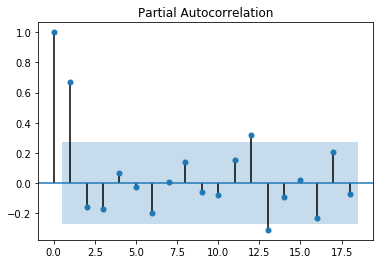

In [21]:
#determine the value of P

plot_pacf(daily_acc)
plt.show()

In [22]:

size = int(len(daily_acc) * 0.80)
train = daily_acc[0:size] 
test = daily_acc[size:len(daily_acc)]

#print(train.size,test.size)

In [23]:
#9,1,5 rmse=89. r2 =32 --9,2,6 rmse=88 r2 =34
from statsmodels.tsa.arima_model import ARIMA
acc_model = ARIMA(train,order=(4,1,2))

C:\Users\Henry\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Henry\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS wi

In [24]:
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',FutureWarning)

acc_model_fit = acc_model.fit()

C:\Users\Henry\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Henry\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA

In [26]:
test.size

11

In [27]:
acc_forecast = acc_model_fit.forecast(steps=11)[0]

In [28]:
print('RMSE: ',np.sqrt(mean_squared_error(test,acc_forecast)))

RMSE:  2647.2866311596217


In [29]:
acc_forecast_df = pd.DataFrame(acc_forecast, index=test.index)

In [30]:
acc_forecast_df.rename(columns={0:'Predictions'},inplace=True)

In [31]:
prediction_df= acc_forecast_df
test_df= test

test_prediction= test_df.join(prediction_df, on='Date')
test_prediction.head(10)

,Accidents,Predictions
Date,,
2019-08-01,7371,6483.065587
2019-09-01,6719,7067.860134
2019-10-01,8661,7243.111495
2019-11-01,6905,7878.071859
2019-12-01,6149,8051.151345
2020-01-01,6089,8572.478263
2020-02-01,5937,8689.738115
2020-03-01,5619,9086.880290
2020-04-01,5297,9158.501855


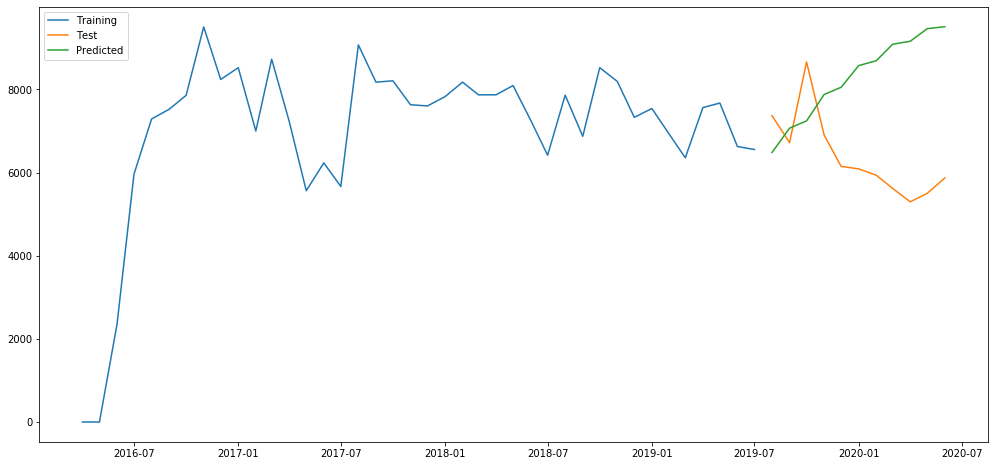

In [32]:
plt.figure(figsize=(17,8))
plt.plot(train,label="Training")
plt.plot(test,label="Test")
plt.plot(acc_forecast_df,label="Predicted")
plt.legend(loc = 'upper left')
plt.show()

In [33]:
print('R-Squared score: ',r2_score(test,acc_forecast))

R-Squared score:  -6.952048759185821


In [35]:
#f1_score(test, acc_forecast)

In [36]:
from sklearn.metrics import f1_score

In [35]:
from pmdarima.arima import auto_arima

In [36]:
import warnings; warnings.simplefilter('ignore')
%matplotlib inline

In [37]:
arima_m = auto_arima(train,start_p=0, d=1, start_q=0, max_p=3, max_d=3, max_q=3,
                     start_P=0, D=1, start_Q=0, max_P=3, max_D=3, max_Q=3, m=12,
                     seasonal=True, stepwise=True, suppress_warnings=True,error_action='warn',
                     trace=True,random_state=20, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=473.818, Time=0.50 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=472.340, Time=0.27 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.11 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=475.448, Time=0.01 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=471.807, Time=0.32 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=inf, Time=1.42 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=0.83 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.37 sec
 ARIMA(1,1,0)(3,1,1)[12]             : AIC=inf, Time=1.78 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=inf, Time=nan sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=473.797, Time=0.47 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=473.748, Time=0.67 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=472.220, Time=0.12 sec
 ARIMA(2,1,1)(2,1,0)[12]             : AIC=475.759, Time=1.15 sec
 ARIMA(1,1,0)(2,1,0)[12] intercept   : AIC=471.893, Time=0

In [38]:
arima_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   40
Model:             SARIMAX(1, 1, 0)x(2, 1, 0, 12)   Log Likelihood                -231.903
Date:                            Tue, 19 Jan 2021   AIC                            471.807
Time:                                    00:03:22   BIC                            476.990
Sample:                                         0   HQIC                           473.348
                                             - 40                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0680      0.190     -0.358      0.720      -0.440       0.304
ar.S.L12      -0.5250      0.206     -2.545      0.011      -0.929      -0.121
ar.S.L24      -0.4133      0.216     -1.912      0.056      -0.837       0.010
sigma2      1.647e+06   6.64e+05      2.481      0.013    3.46e+05    2.95e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.66   Jarque-Bera (JB):                 0.37
Prob(Q):                              0.42   Prob(JB):                         0.83
Heteroskedasticity (H):               0.38   Skew:                             0.14
Prob(H) (two-sided):                  0.16   Kurtosis:                         2.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [40]:
predictn = pd.DataFrame(arima_m.predict(n_periods = 11), index=test.index)
predictn.columns =['predictionx']
predictn

,predictionx
Date,
2019-08-01,8243.418547
2019-09-01,7764.763209
2019-10-01,8691.362428
2019-11-01,9150.079665
2019-12-01,8214.584633
2020-01-01,8456.855597
2020-02-01,7569.357221
2020-03-01,7983.354041
2020-04-01,7937.406843


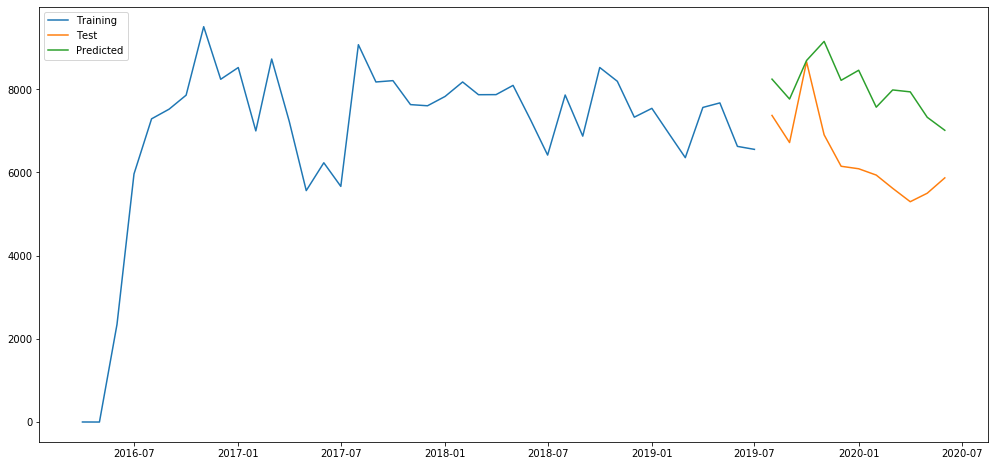

In [43]:
plt.figure(figsize=(17,8))
plt.plot(train,label="Training")
plt.plot(test,label="Test")
plt.plot(predictn,label="Predicted")
plt.legend(loc = 'upper left')
plt.show()

In [44]:
print('R-Squared score: ',r2_score(test,predictn))

R-Squared score:  -2.779043014423875
